In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import metrics

In [2]:
# Step 2: Import Dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('expected_ctc.csv')
df.columns = df.columns.str.strip()
df.drop(columns=['IDX', 'Applicant_ID'], inplace=True)

Saving expected_ctc.csv to expected_ctc.csv


In [3]:
# Step 3: Impute All Missing Values
print("--- Imputing Missing Values ---")
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)
print("Total null values remaining:", df.isnull().sum().sum())
print("\n" + "="*50 + "\n")

--- Imputing Missing Values ---
Total null values remaining: 0




/tmp/ipython-input-3-194045419.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-3-194045419.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Experience                   25000 non-null  int64  
 1   Total_Experience_in_field_applied  25000 non-null  int64  
 2   Department                         25000 non-null  object 
 3   Role                               25000 non-null  object 
 4   Industry                           25000 non-null  object 
 5   Organization                       25000 non-null  object 
 6   Designation                        25000 non-null  object 
 7   Education                          25000 non-null  object 
 8   Graduation_Specialization          25000 non-null  object 
 9   University_Grad                    25000 non-null  object 
 10  Passing_Year_Of_Graduation         25000 non-null  float64
 11  PG_Specialization                

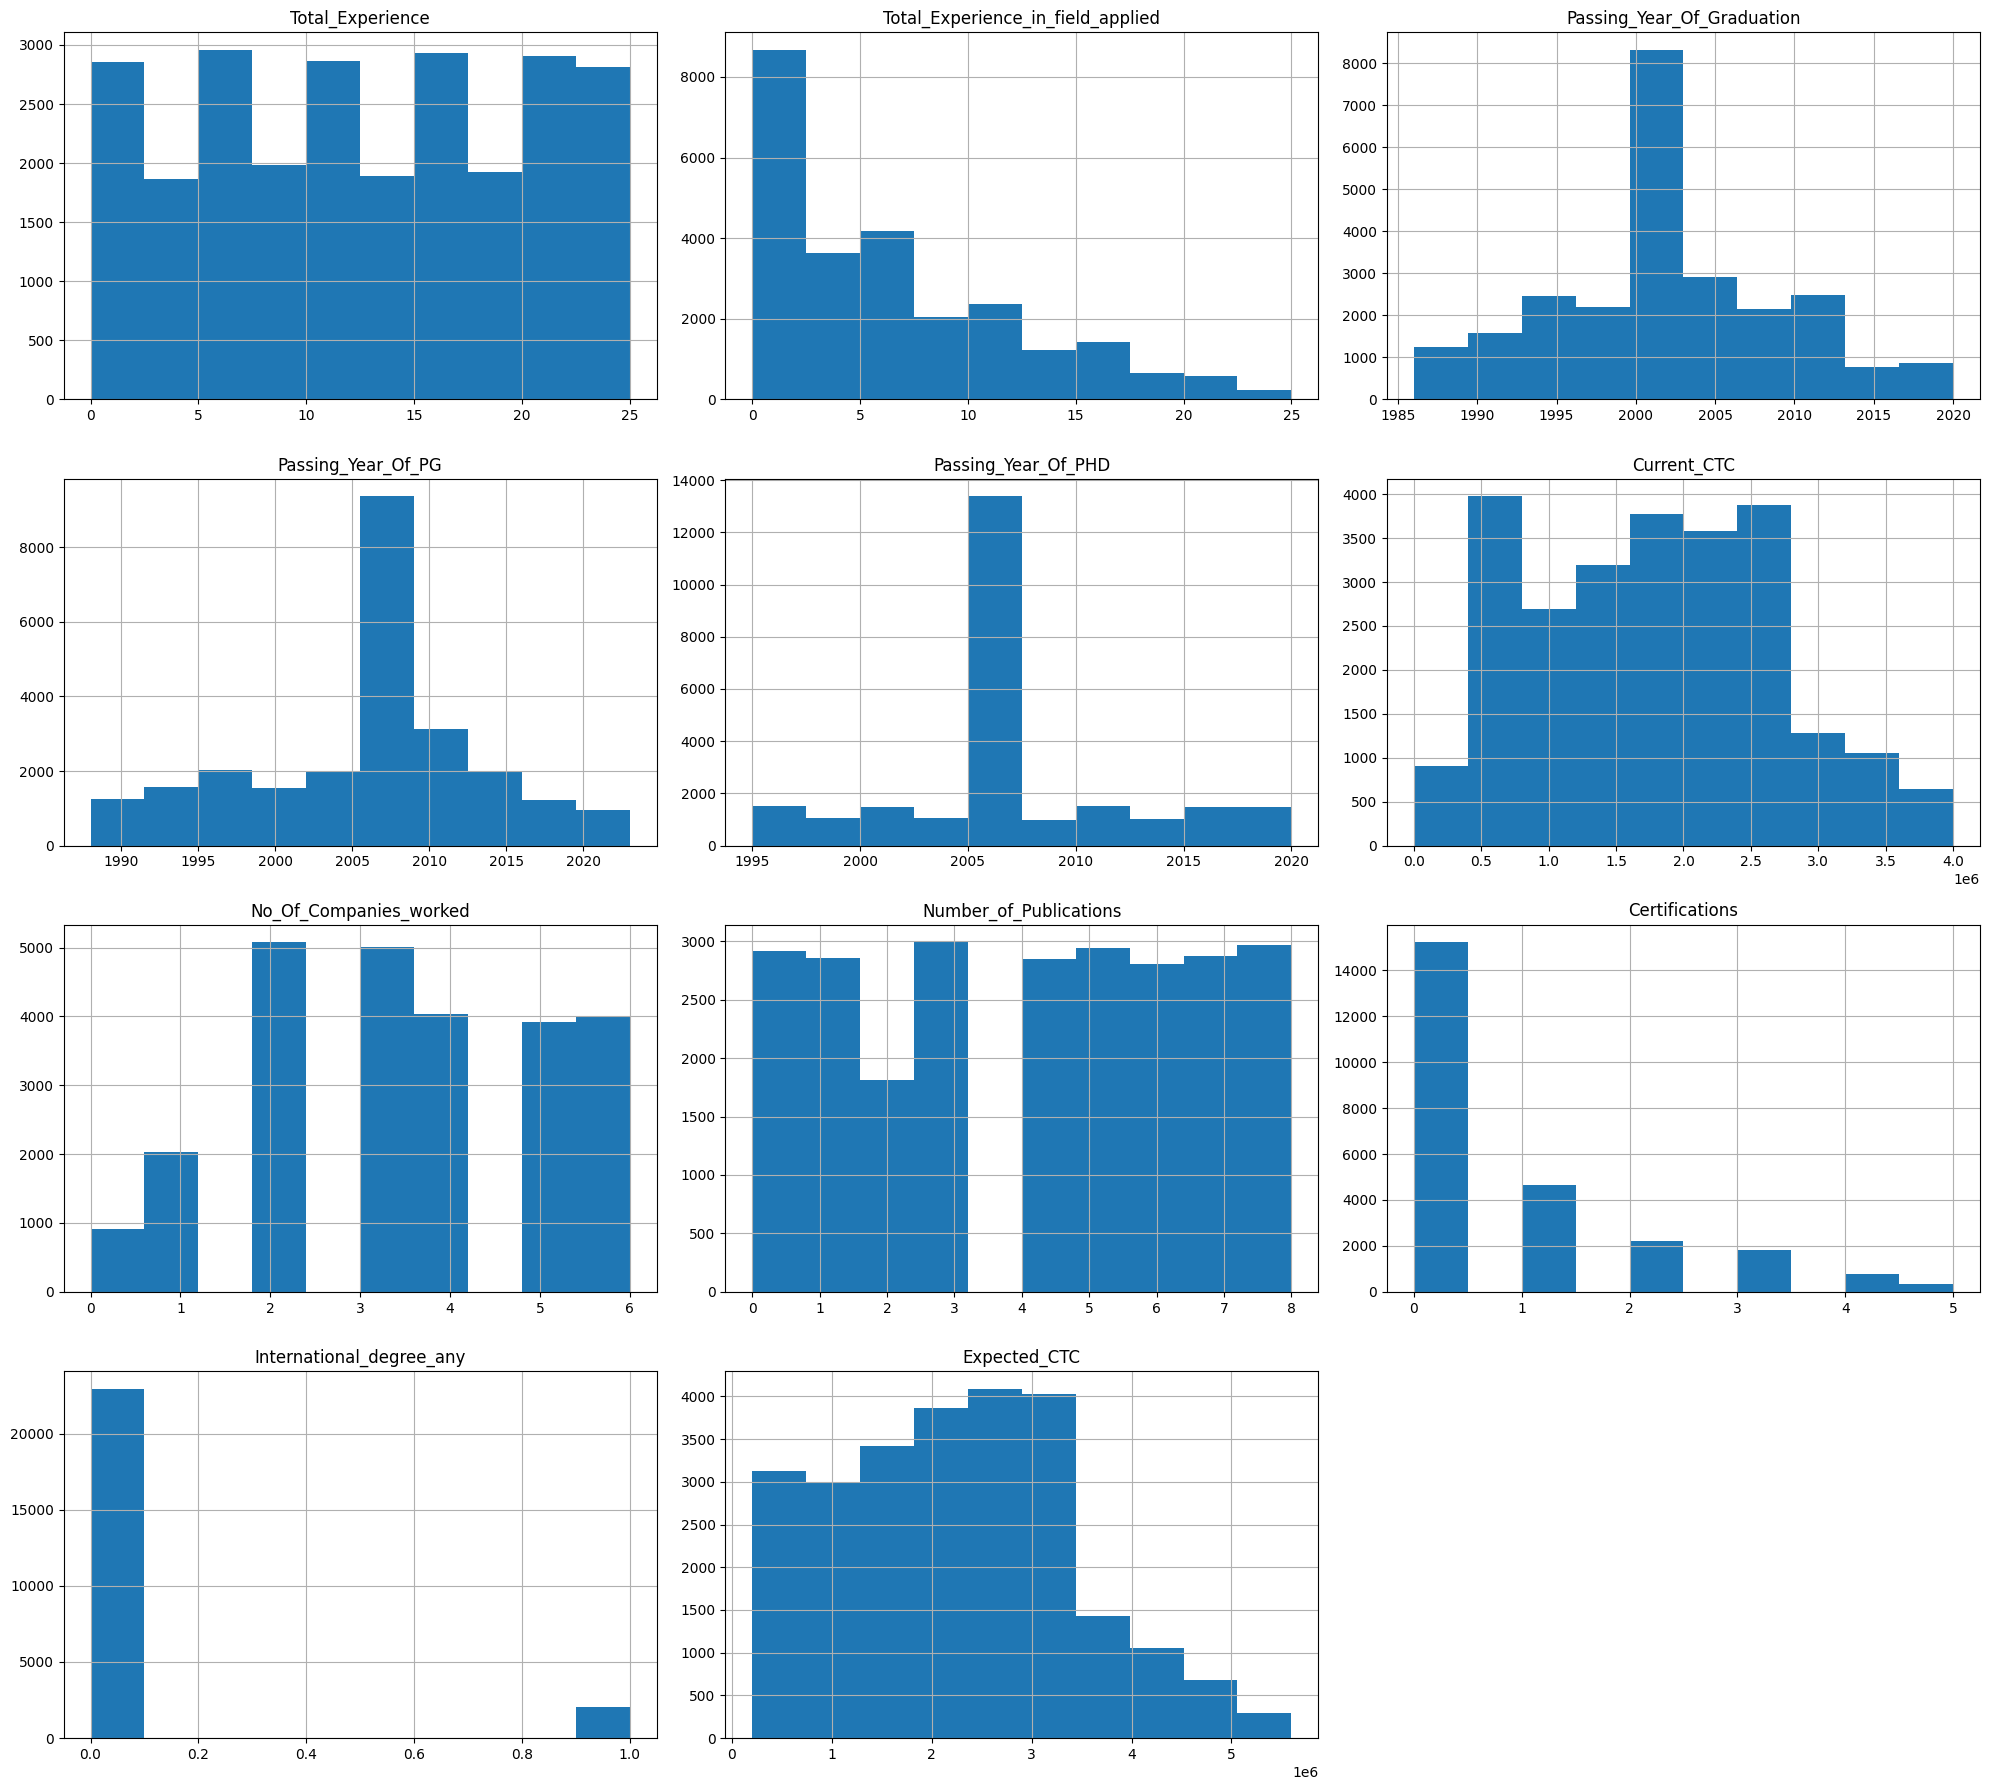

In [4]:
# Step 4: Exploratory Data Analysis
print("--- Dataset Info ---")
df.info()
print("\n" + "="*50 + "\n")
print("--- Statistical Summary ---")
print(df.describe())
print("\n" + "="*50 + "\n")
print("--- Data Distribution (Histograms) ---")
df.hist(figsize=(20, 18))
plt.tight_layout()
plt.show()
print("\n" + "="*50 + "\n")

In [5]:
# Step 5: Convert Categorical to Numerical
print("--- Converting Categorical to Numerical ---")
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Data after one-hot encoding:")
print(df_encoded.head())
print("\n" + "="*50 + "\n")

--- Converting Categorical to Numerical ---
Data after one-hot encoding:
   Total_Experience  Total_Experience_in_field_applied  \
0                 0                                  0   
1                23                                 14   
2                21                                 12   
3                15                                  8   
4                10                                  5   

   Passing_Year_Of_Graduation  Passing_Year_Of_PG  Passing_Year_Of_PHD  \
0                      2020.0              2006.0               2007.0   
1                      1988.0              1990.0               1997.0   
2                      1990.0              1992.0               1999.0   
3                      1997.0              1999.0               2005.0   
4                      2004.0              2006.0               2010.0   

   Current_CTC  No_Of_Companies_worked  Number_of_Publications  \
0            0                       0                       0   
1

--- Outlier Detection and Removal ---


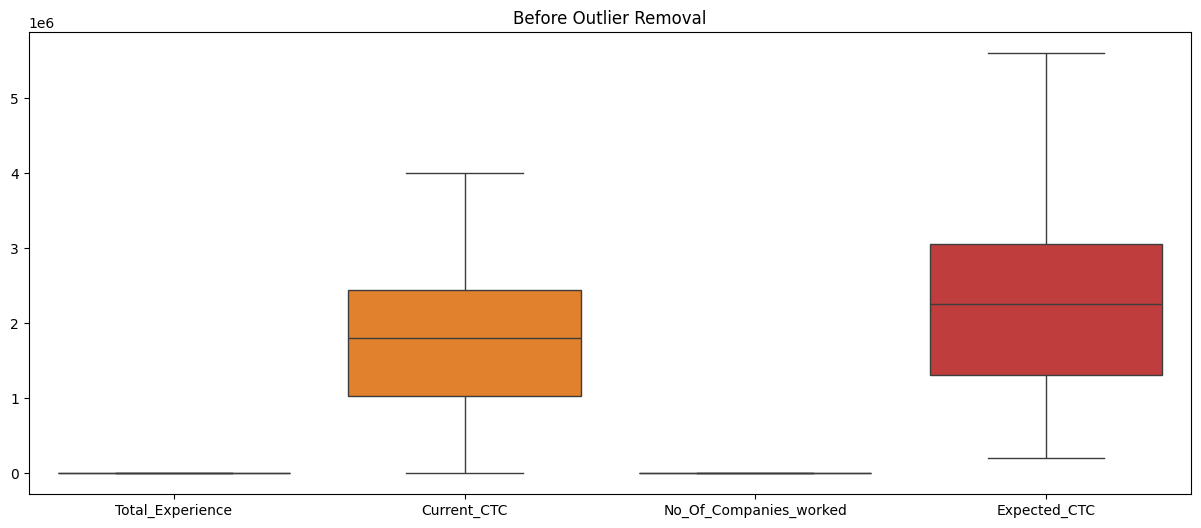

In [6]:
# Step 6: Check and Drop Outliers
print("--- Outlier Detection and Removal ---")
numerical_cols = ['Total_Experience', 'Current_CTC', 'No_Of_Companies_worked', 'Expected_CTC']
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_encoded[numerical_cols])
plt.title('Before Outlier Removal')
plt.show()


In [9]:
# Step 7: Declare Feature Vector and Target Variable
X = df_encoded.drop('Expected_CTC', axis=1)
y = df_encoded['Expected_CTC']

In [10]:
# Step 8: Split Data into Separate Training and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print("\n" + "="*50 + "\n")

Training set shape: (20000, 188)
Test set shape: (5000, 188)




In [11]:
# Step 9: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Step 10: Model Training, Prediction, and Evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'KNN': KNeighborsRegressor(),
    'SVR': SVR()
}
results = {}

print("--- Model Performance ---")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = metrics.r2_score(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    results[name] = [r2, mae, rmse]
    print(f"--- {name} ---")
    print(f'R-squared: {r2:.4f}')
    print(f'Mean Absolute Error: {mae:.4f}')
    print(f'Root Mean Squared Error: {rmse:.4f}\n')
print("\n" + "="*50 + "\n")

--- Model Performance ---
--- Linear Regression ---
R-squared: 0.9934
Mean Absolute Error: 65210.8672
Root Mean Squared Error: 94563.3030

--- Decision Tree ---
R-squared: 0.9995
Mean Absolute Error: 12686.4162
Root Mean Squared Error: 27246.1800

--- Random Forest ---
R-squared: 0.9996
Mean Absolute Error: 11330.9563
Root Mean Squared Error: 22671.9762

--- KNN ---
R-squared: 0.4828
Mean Absolute Error: 646761.9168
Root Mean Squared Error: 836387.9209

--- SVR ---
R-squared: 0.0002
Mean Absolute Error: 961707.7144
Root Mean Squared Error: 1162854.5840





--- Model Comparison ---
                   R-squared            MAE          RMSE
Linear Regression   0.993388   65210.867190  9.456330e+04
Decision Tree       0.999451   12686.416200  2.724618e+04
Random Forest       0.999620   11330.956346  2.267198e+04
KNN                 0.482767  646761.916840  8.363879e+05
SVR                 0.000182  961707.714447  1.162855e+06


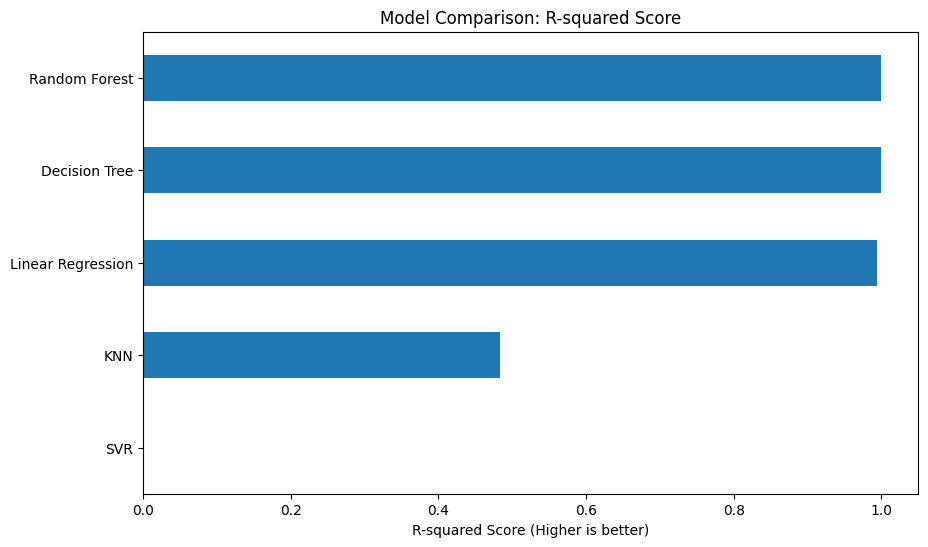

In [13]:
# Step 11: Visualization of Model Comparison
print("--- Model Comparison ---")
results_df = pd.DataFrame(results, index=['R-squared', 'MAE', 'RMSE']).T
print(results_df)

results_df['R-squared'].sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Model Comparison: R-squared Score')
plt.xlabel('R-squared Score (Higher is better)')
plt.show()